# This notebook contains signals with different types of trends (linear,non linear,cosine and s shaped trend)

In [2]:
from pyhht import EMD
import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt
%matplotlib inline
from pyleoclim.utils import spectral

In [3]:
import warnings


In [4]:
warnings.filterwarnings('ignore')

In [5]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [6]:
def strictly_decreasing(L):
    '''
    method to check if the values in the given array is nearly decreasing 
    '''
    n = len(L)
    s=list(x>=y for x, y in zip(L, L[1:]))
    a = list(filter(lambda x:x!=False,s))
    if n-len(a)<=10:
        return True
    return False


The method defined above fails to generalize for all signals so a better function to detect asymptotes needs to be defined

# Linear trend

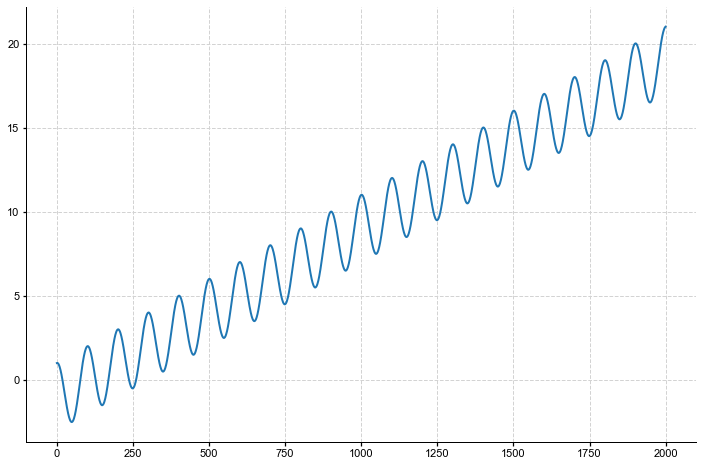

In [12]:
'''Adding a linear trend of the form mx+c to a synthetically generated cosine signal'''
t = np.arange(2001)
f = 1/50
signal = 2*np.cos(np.pi*f*t)
slope = 0.01
intercept = -1
linear_trend = slope*t + intercept
signal_linear = signal+linear_trend
plt.figure(figsize=(12,8)) 
plt.plot(signal_linear)



# Linear Trend for Signal with noise

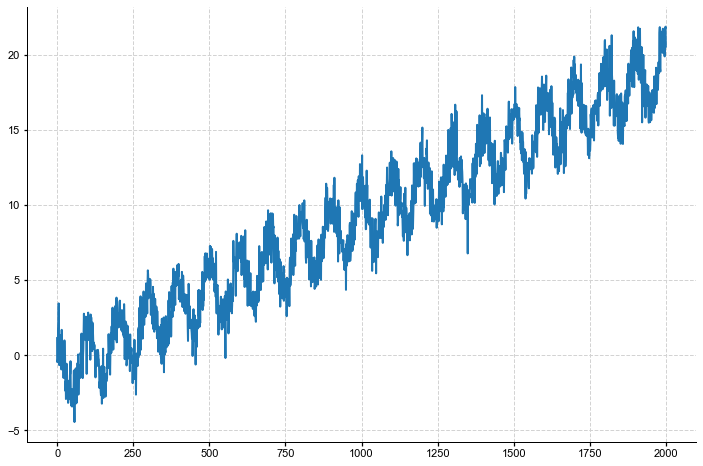

In [13]:
'''Same procedure but this time we add noise to the signal with twice the variance of signal'''
sig_var = np.var(signal)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
slope = 0.01
intercept = -1
signal_noise = signal+white_noise
linear_trend = slope*t + intercept
signal_linear_noise = signal_noise+linear_trend
plt.figure(figsize=(12,8))
plt.plot(signal_linear_noise)

# Decomposing using EMD and removing modes which have asymptotes

# We decompose the generated signal using EMD, plot all modes and check for the mode which has an asymptote and remove that mode from the signal

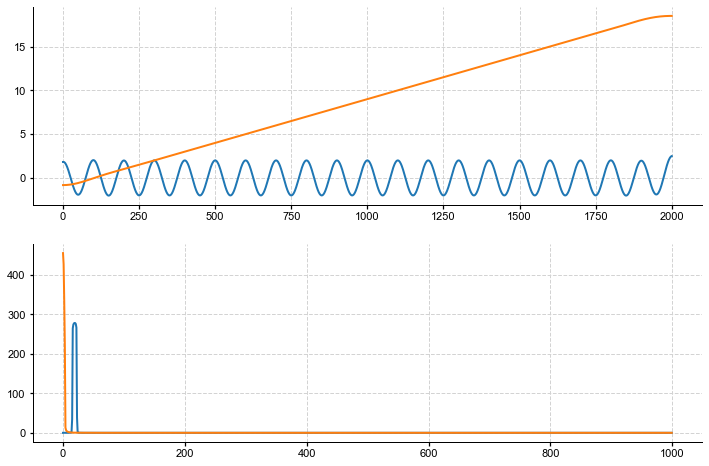

In [14]:
a =EMD(signal_linear).decompose()
plt.figure(figsize=(12,8))
#plt.subplots(nrows=2,ncols=2)


for b,i in enumerate(a):
    
    
  
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict = spectral.mtm(i,np.arange(len(i)))
    #print(res_dict['psd'])
    #print(len(res_dict['psd']))
    x = res_dict['psd']
   
    x = x[~np.isnan(x)]
    flag = strictly_decreasing(x)
    if flag:
        signal_linear = signal_linear - i
    
    
   
    plt.subplot(2,1,2)
    plt.plot(x)
    #plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
plt.legend()
plt.show()

# Plotting Detrended Signal

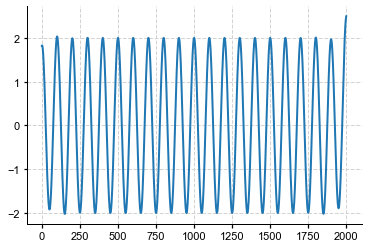

In [11]:
plt.plot(signal_linear)

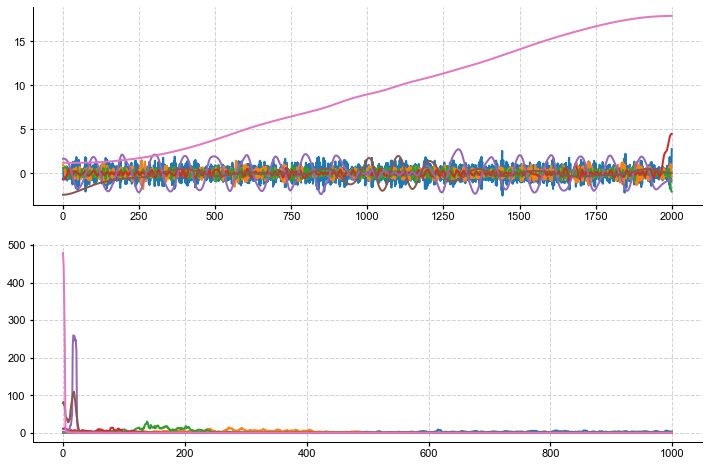

In [119]:
d = EMD(signal_linear_noise).decompose()
plt.figure(figsize=(12,8))
for b,i in enumerate(d):
    

    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    x = res_dict['psd']
   
    x = x[~np.isnan(x)]
    flag = strictly_decreasing(x)
    
    if flag:
        signal_linear_noise = signal_linear_noise-i
    plt.subplot(2,1,2)
    plt.plot(x)
    #plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
plt.legend()
plt.show()

# Plotting Detrended Signal

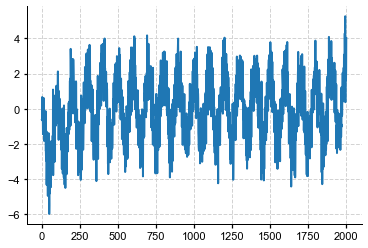

In [120]:
plt.plot(signal_linear_noise)

# Non Linear Trend

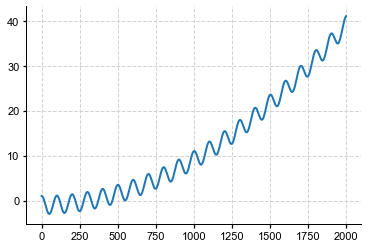

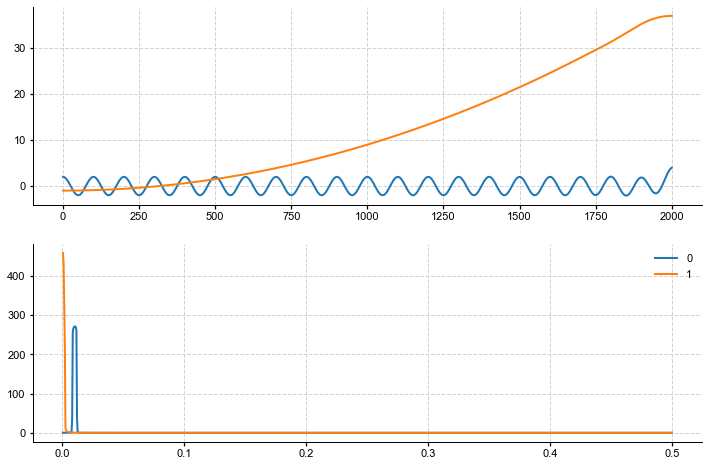

In [139]:
slope = 1e-5
intercept = -1
non_linear_trend = slope*t**2 + intercept
signal_non_linear = signal+non_linear_trend
plt.plot(signal_non_linear)
d=EMD(signal_non_linear).decompose()
plt.figure(figsize=(12,8))
for b,i in enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    x = res_dict['psd']
   
    x = x[~np.isnan(x)]
    
    flag = strictly_decreasing(x)
    if flag:
        signal_non_linear = signal_non_linear-i
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    

plt.legend()

# Plotting Detrended Signal

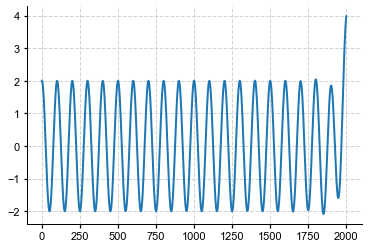

In [122]:
plt.plot(signal_non_linear)

# Non Linear Trend for Noisy Signal

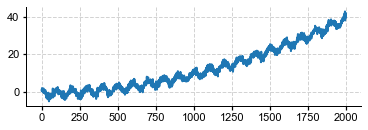

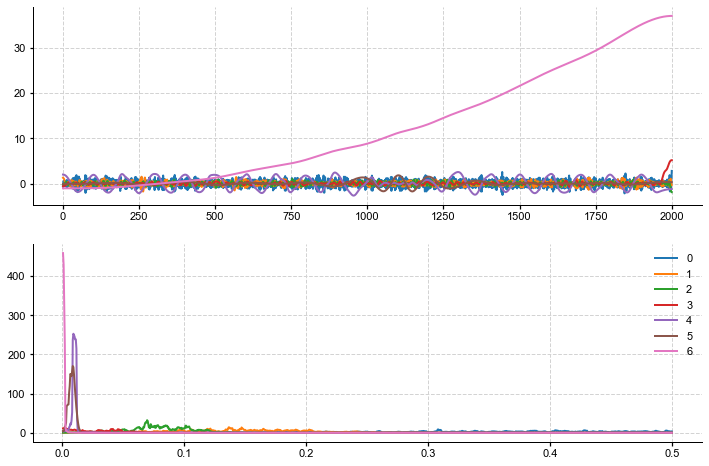

In [123]:
signal_non_linear_noisy_trend = signal_noise+non_linear_trend
plt.subplot(2,1,1)
plt.plot(signal_non_linear_noisy_trend)
d=EMD(signal_non_linear_noisy_trend).decompose()
plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
for b,i in enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    x = res_dict['psd']
   
    x = x[~np.isnan(x)]
    flag = strictly_decreasing(x)
    if flag:
        signal_non_linear_noisy_trend = signal_non_linear_noisy_trend-i
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
    
plt.legend()

# Plotting Detrended Signal

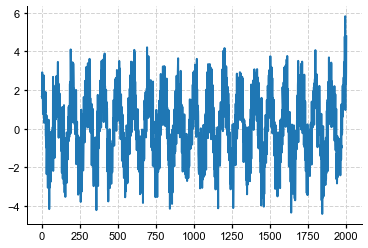

In [124]:
plt.plot(signal_non_linear_noisy_trend)

# Cosine Trend

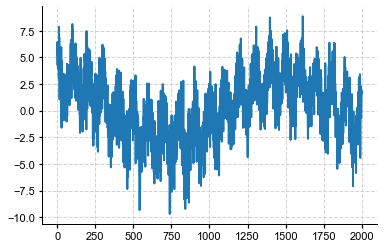

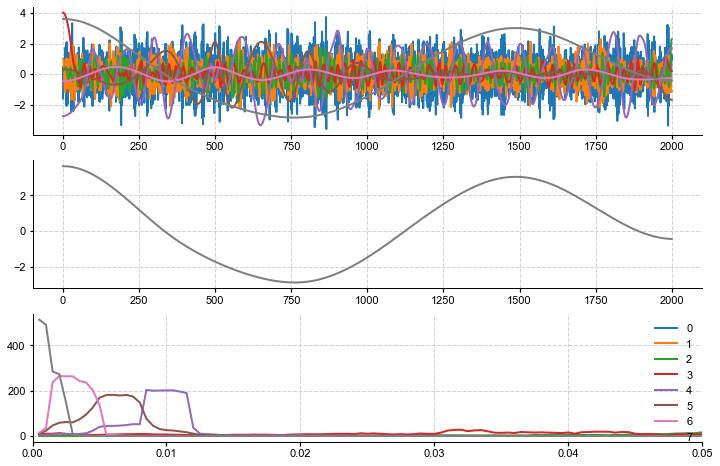

In [143]:
freq = 1/1500
signal2 = np.cos(2*np.pi*freq*t)
signal_cos = signal+3*signal2
sig_var = np.var(signal_cos)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal_cos))
signal_cos = signal_cos+white_noise
plt.plot(signal_cos)
c=EMD(signal_cos).decompose()
plt.figure(figsize=(12,8))
for b,i in enumerate(c):
    plt.subplot(3,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    x = res_dict['psd']
   
    x = x[~np.isnan(x)]
    flag = strictly_decreasing(x)
    temp = []
    if flag:
        temp.extend(i)
    plt.subplot(3,1,2)
    plt.plot(temp)
        

    if flag:
        signal_cos = signal_cos-i
    plt.subplot(3,1,3)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    plt.xlim([0,0.05])
    
    
plt.legend()

# Plotting Detrended Signal

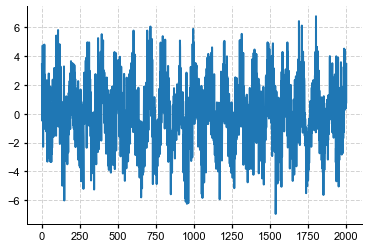

In [126]:
plt.plot(signal_cos)

# S Shaped Trend

here
here


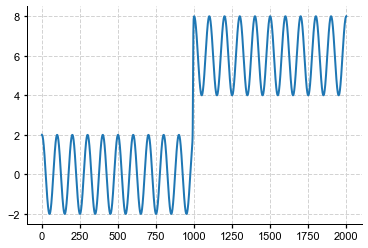

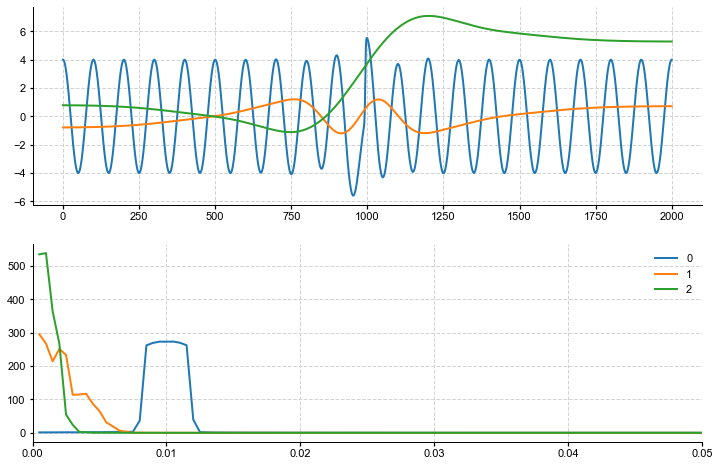

In [18]:
Y = 6*t / ( t+ np.exp(1000-1*t)) 
signal_s = signal+Y
plt.plot(signal_s)
signal_s = signal+signal_s


d=EMD(signal_s).decompose()

plt.figure(figsize=[12,8])
for b,i in  enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    x = res_dict['psd']
   
    x = x[~np.isnan(x)]
    flag = strictly_decreasing(x)
    temp = []
    if flag:
        temp.extend(i)
    if flag:
        print('here')
        signal_s = signal_s-i
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    plt.xlim([0,0.05])
    
    
plt.legend()


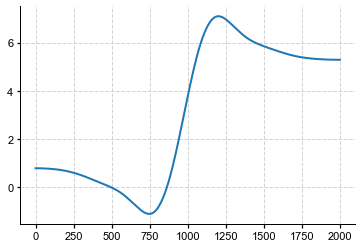

In [17]:
plt.plot(temp)

# Plotting Detrended Signal

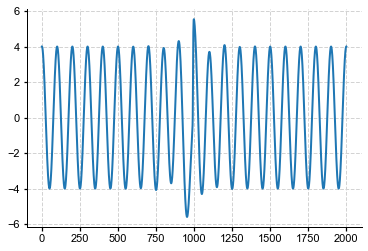

In [19]:
plt.plot(signal_s)